In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración general
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted")

import warnings
warnings.filterwarnings("ignore")


# Carga de datos

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dimensiones del dataset:", df.shape)
display(df.head())

Dimensiones del dataset: (7043, 21)


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Información general y valores nulos

In [3]:
print("\nInformación general:")
df.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

# Missing values en total charges

In [27]:
missing_totalcharges = df[df['TotalCharges'].isna()]

print("Number of rows with missing values in Total Charges:", len(missing_totalcharges))

missing_totalcharges[['TotalCharges', 'tenure', 'MonthlyCharges','Churn']].head()

Number of rows with missing values in Total Charges: 11


TotalCharges  tenure  MonthlyCharges Churn
488            NaN       0           52.55    No
753            NaN       0           20.25    No
936            NaN       0           80.85    No
1082           NaN       0           25.75    No
1340           NaN       0           56.05    No

In [28]:
missing_with_tenure0 = missing_totalcharges[missing_totalcharges['tenure'] == 0]

print("Number of rows where TotalCharges is missing and tenure is 0:", len(missing_with_tenure0))
missing_with_tenure0[['TotalCharges', 'tenure', 'MonthlyCharges']].head()

Number of rows where TotalCharges is missing and tenure is 0: 11


TotalCharges  tenure  MonthlyCharges
488            NaN       0           52.55
753            NaN       0           20.25
936            NaN       0           80.85
1082           NaN       0           25.75
1340           NaN       0           56.05

Se identificaron valores nulos en la variable TotalCharges, todos correspondientes a clientes con tenure igual a 0. Esto indica que se trata de nuevos usuarios que aún no han completado su primer mes de servicio, por lo que no registran cargos totales.
Estos casos no están asociados a cancelaciones, sino al momento de registro del cliente, por lo que su exclusión o imputación no afecta el análisis del churn.

# Estadisticas descriptivas

In [5]:
# Conversión de TotalCharges a numérica
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Eliminación de la variable binaria SeniorCitizen para el resumen numérico
cols_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Estadísticas descriptivas numéricas:")
display(df[cols_numericas].describe().round(2))


Estadísticas descriptivas numéricas:


tenure  MonthlyCharges  TotalCharges
count  7043.00         7043.00       7032.00
mean     32.37           64.76       2283.30
std      24.56           30.09       2266.77
min       0.00           18.25         18.80
25%       9.00           35.50        401.45
50%      29.00           70.35       1397.48
75%      55.00           89.85       3794.74
max      72.00          118.75       8684.80

Los resultados muestran una antigüedad promedio de 32 meses, cargos mensuales de 65 USD y un total facturado promedio de 2,283 USD, con alta dispersión entre clientes.

Estos valores evidencian que la permanencia está directamente relacionada con los ingresos generados: los clientes de mayor tiempo aportan un valor acumulado significativamente superior. Este análisis proporciona una base clave para identificar segmentos de alto valor y riesgo, orientando las decisiones posteriores de modelado y retención.

# Correlación entre tenure, MonthlyCharges y TotalCharges

In [6]:
corr_num = df[cols_numericas].corr()
print("Correlation between Total Charges, Monthly Charges, and Tenure:")
display(corr_num)

Correlation between Total Charges, Monthly Charges, and Tenure:


tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000

El análisis de correlación muestra una fuerte relación positiva entre tenure y TotalCharges (r = 0.83), lo que indica que a mayor tiempo de permanencia, mayor es el monto total facturado por el cliente.
Asimismo, existe una correlación moderada entre MonthlyCharges y TotalCharges (r = 0.65), reflejando que los clientes con cargos mensuales más altos tienden a acumular un mayor valor total, aunque no necesariamente permanecen más tiempo en la empresa.

Estas relaciones confirman la importancia de la permanencia (tenure) y el gasto mensual (MonthlyCharges) como variables clave para el modelado del churn, ya que combinan valor económico y nivel de fidelidad del cliente.

# Correlación entre total charges y monthly charges

In [24]:
df_new = df[cols_numericas].copy()
df_new['MonthlyCharges_x_tenure'] = df_new['MonthlyCharges'] * df_new['tenure']
correlation = df_new[['TotalCharges', 'MonthlyCharges_x_tenure']].corr().iloc[0,1]
print("Correlation between TotalCharges and MonthlyCharges * tenure:", correlation)

Correlation between TotalCharges and MonthlyCharges * tenure: 0.9995598572867943


La correlación entre TotalCharges y el producto de MonthlyCharges × tenure es de 0.9996, lo que indica una relación lineal casi perfecta. Este resultado confirma que el monto total facturado se determina esencialmente al multiplicar el cargo mensual por los meses de permanencia. Las pequeñas desviaciones observadas podrían deberse a descuentos, promociones u otros ajustes aplicados antes del cálculo final de los cargos.

In [7]:
print("\nEstadísticas categóricas:")
display(df.describe(include='object'))


Estadísticas categóricas:


customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod Churn  
count              7043              7043  7043  
unique                2                 4     2  
top                 Yes  Electronic check    No  
freq               4171              2365  5174

En las variables categóricas se observó un equilibrio razonable entre hombres y mujeres (gender), mientras que la mayoría de los clientes no tienen dependientes (≈52%) y sí cuentan con servicio telefónico (≈90%).
En cuanto al tipo de conexión, predomina el servicio de fibra óptica (44%), seguido de DSL y sin servicio de Internet.
Más de la mitad de los clientes no utilizan servicios adicionales como seguridad en línea, respaldo o soporte técnico.
El tipo de contrato más frecuente es “Month-to-month” (mensual), que representa alrededor del 55% de la base, lo cual sugiere una mayor propensión al churn al no existir compromisos a largo plazo.
El método de pago más común es el “Electronic check”, asociado históricamente a mayor riesgo de cancelación.

Finalmente, la variable objetivo (Churn) muestra que aproximadamente 26% de los clientes abandonaron el servicio, lo que confirma la relevancia del problema y la necesidad de estrategias predictivas y preventivas.

# Total charges vs Monthly cahrges

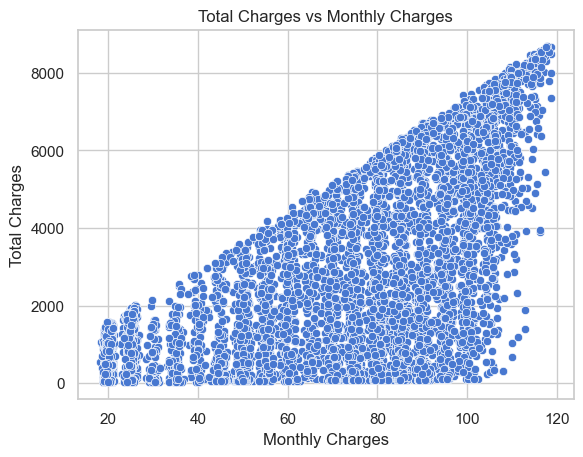

In [31]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges',)
plt.title('Total Charges vs Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

# Total charges vs Tenure

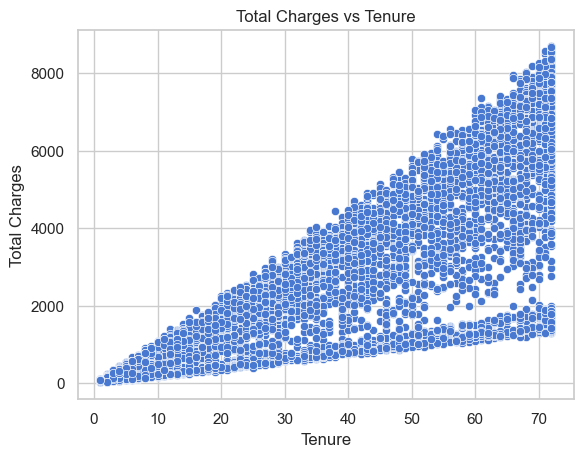

In [33]:
sns.scatterplot(data=df, x='tenure', y='TotalCharges')
plt.title('Total Charges vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

Los gráficos muestran una fuerte relación positiva entre TotalCharges y las variables MonthlyCharges y tenure. A medida que aumentan los cargos mensuales y el tiempo de permanencia, también se incrementa el monto total facturado por cliente. Este patrón confirma la coherencia del conjunto de datos y la existencia de multicolinealidad entre estas variables, ya que TotalCharges depende directamente del producto entre MonthlyCharges y tenure.

Por otra parte, los valores faltantes en TotalCharges corresponden a clientes nuevos con tenure = 0, que aún no han generado cargos acumulados, por lo que se imputaron con valor cero.

# Distribución variable objetivo

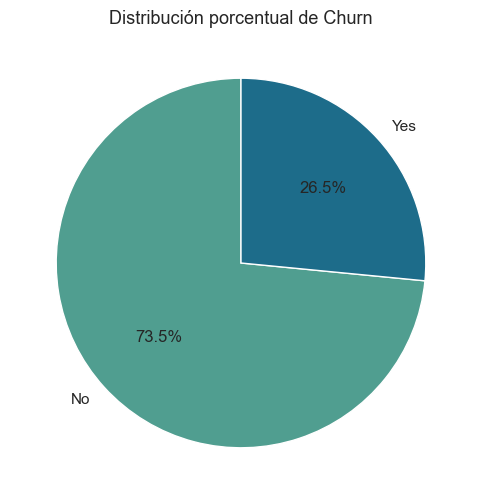

In [8]:
plt.figure(figsize=(6,6))
churn_counts = df['Churn'].value_counts()
colors = sns.color_palette('crest', n_colors=len(churn_counts))

plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Distribución porcentual de Churn", fontsize=13)
plt.show()

La variable Churn presenta una distribución desbalanceada, con un 26.5% de clientes que abandonaron el servicio frente a un 73.5% que permanecieron.
Este resultado indica que, aunque la mayoría de los clientes son leales, uno de cada cuatro termina cancelando, lo que representa un impacto relevante en la retención y justifica el desarrollo de un modelo predictivo para anticipar estos casos.

# Variables categoricas

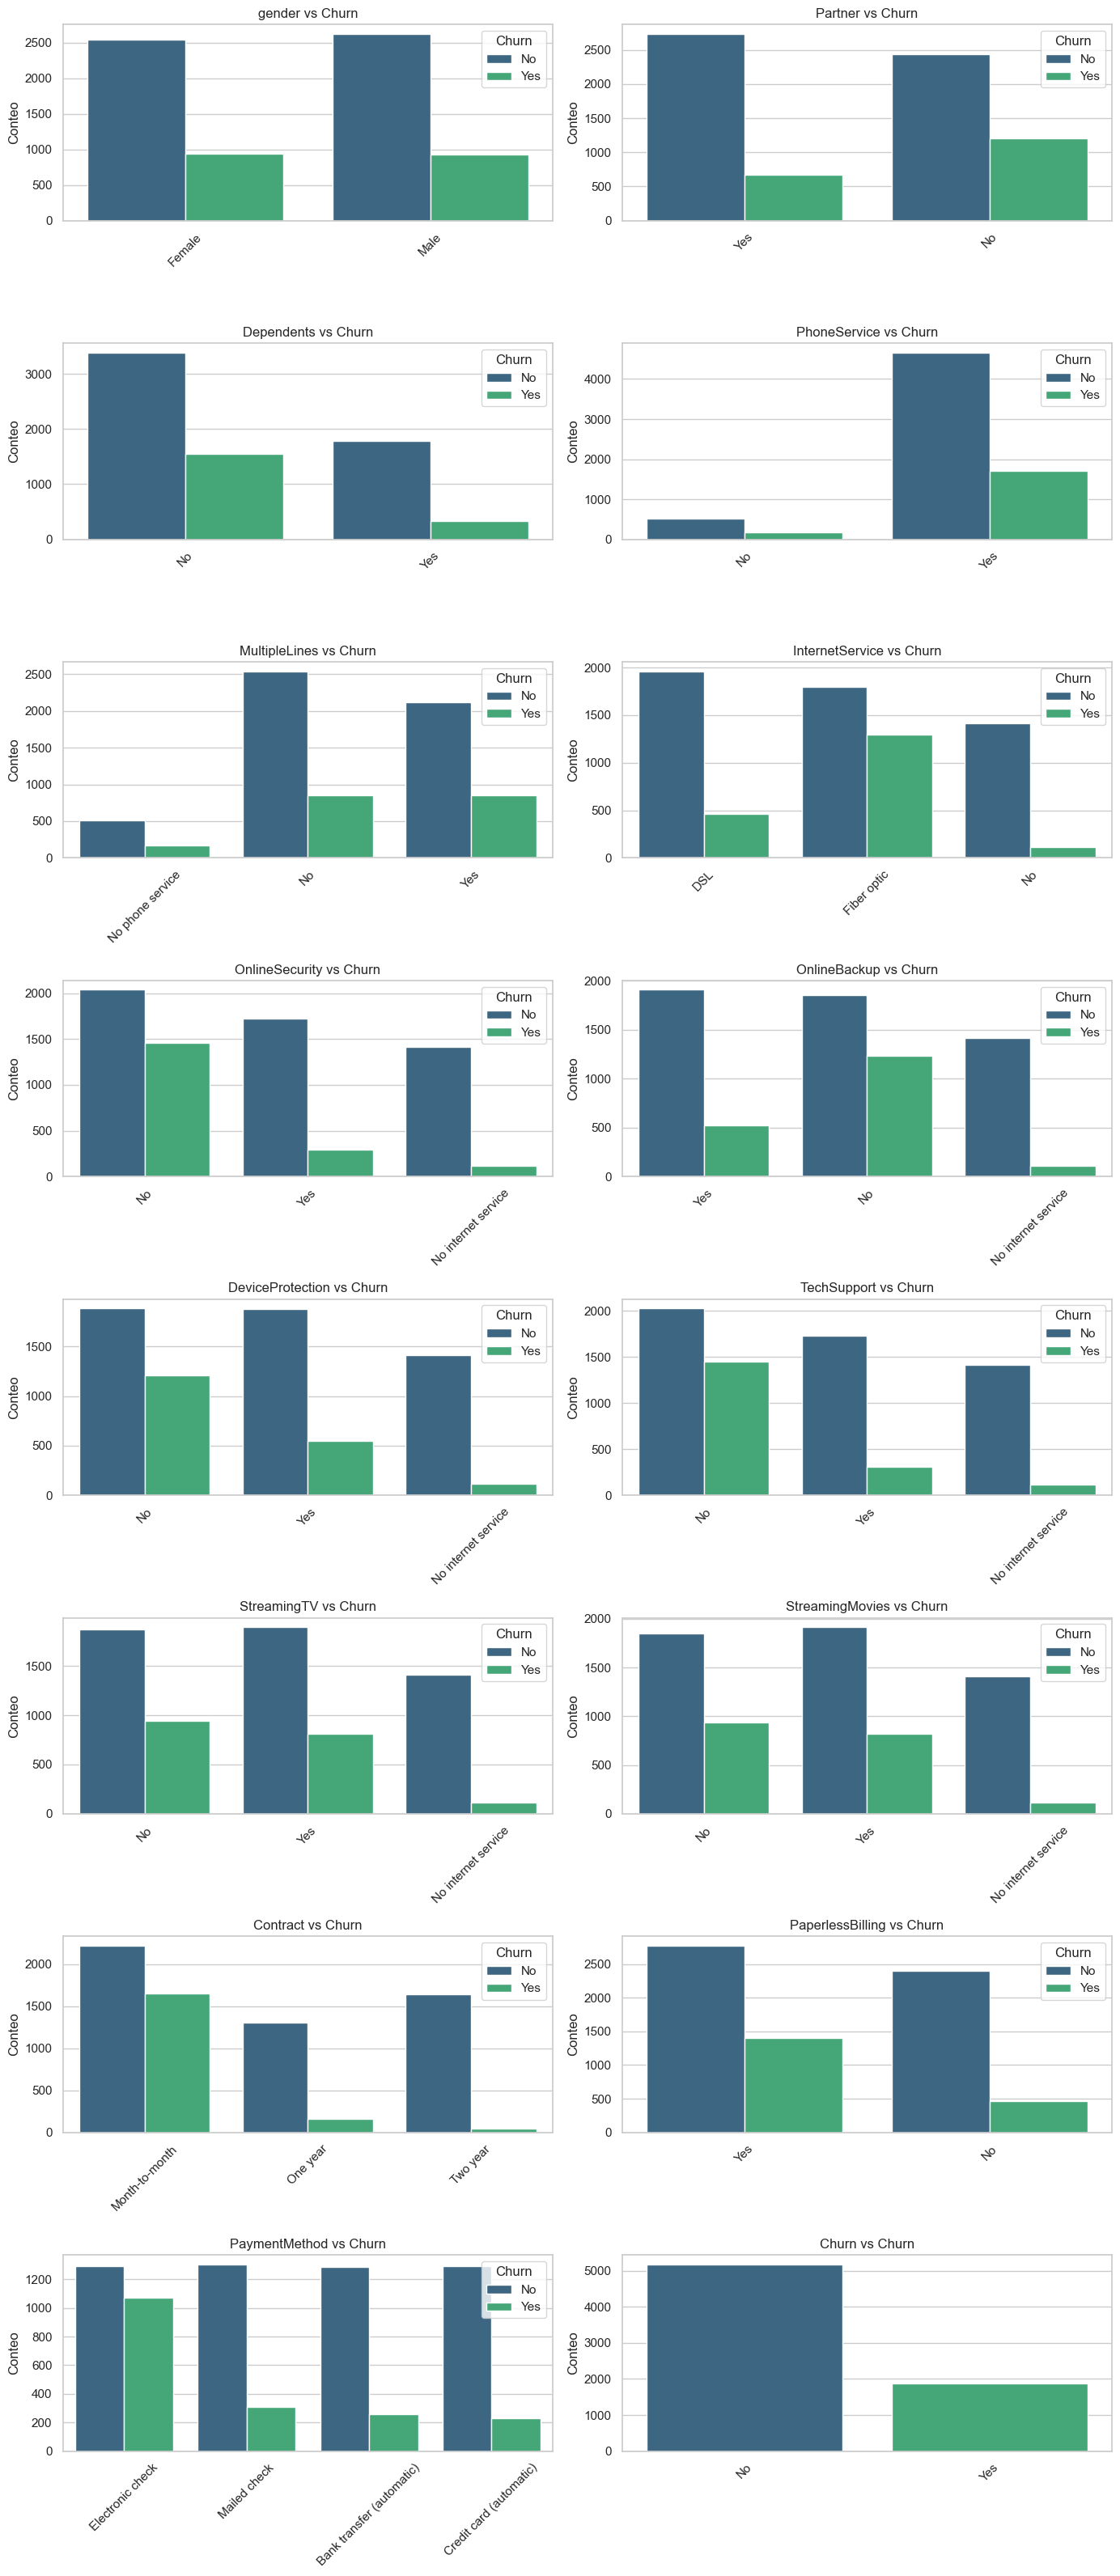

In [9]:
import math
cat_vars = df.select_dtypes(include=['object']).columns.tolist()
cat_vars = [c for c in df.select_dtypes(include='object').columns if c not in ['customerID','TotalCharges']]

n = len(cat_vars)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_vars):
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis', ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Conteo")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlaciones numéricas

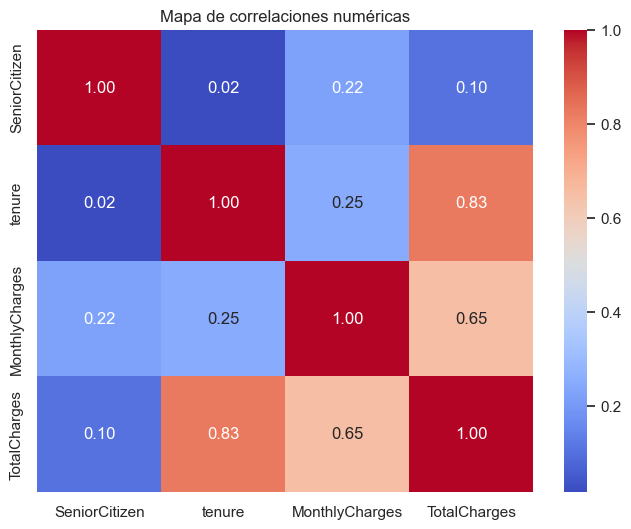

In [10]:
num_vars = df.select_dtypes(include=['int64','float64']).columns.tolist()

plt.figure(figsize=(8,6))
corr = df[num_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de correlaciones numéricas")
plt.show()

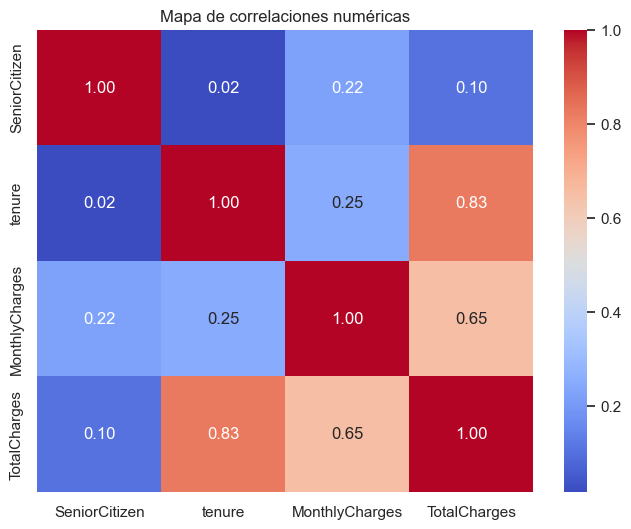

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de correlaciones numéricas")
plt.show()

# Distribucion de monthly charges by churn

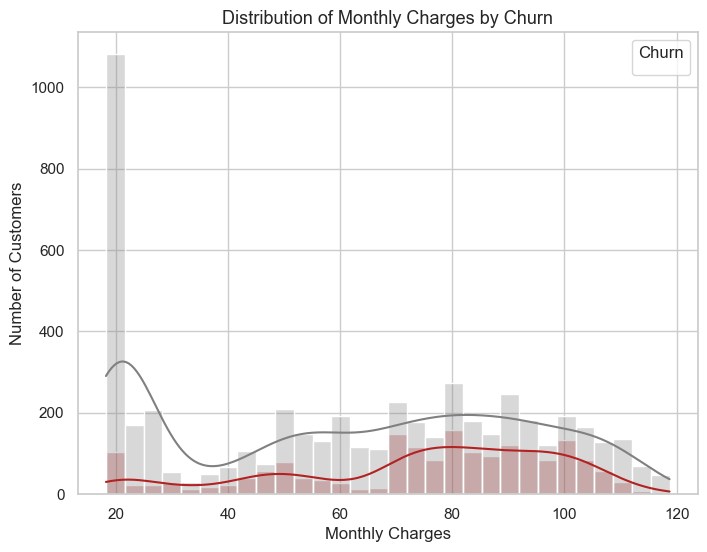

In [12]:
plt.figure(figsize=(8,6))

sns.histplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    kde=True,
    stat='count',
    palette={'No': 'gray', 'Yes': 'firebrick'},
    alpha=0.3,
    bins=30
)

plt.title("Distribution of Monthly Charges by Churn", fontsize=13)
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.legend(title='Churn')
plt.show()

# Distribución de tenure por churn

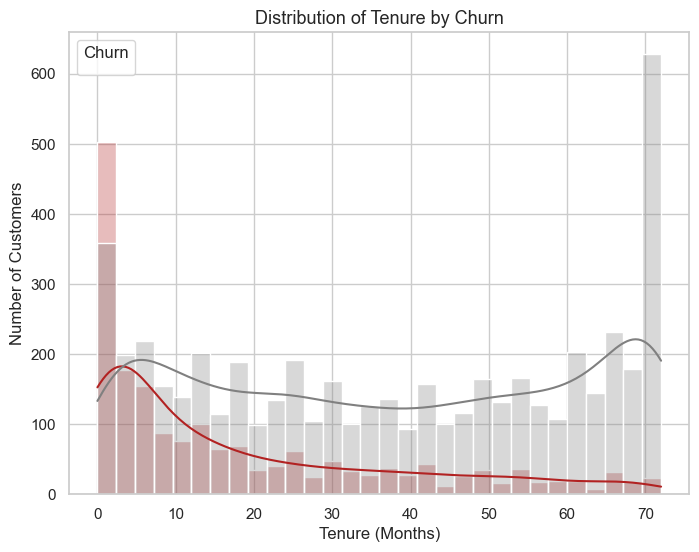

In [13]:
plt.figure(figsize=(8,6))

sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    kde=True,
    stat='count',
    palette={'No': 'gray', 'Yes': 'firebrick'},
    alpha=0.3,
    bins=30
)

plt.title("Distribution of Tenure by Churn", fontsize=13)
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.legend(title='Churn')
plt.show()


# Distribucion por genero

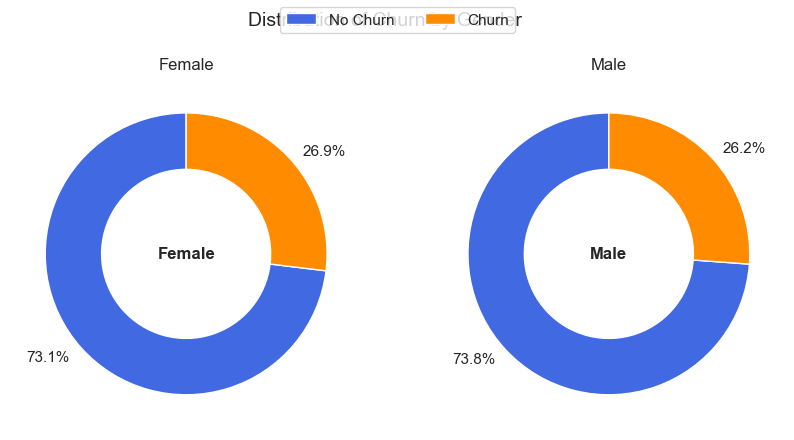

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

colors = ['royalblue', 'darkorange']

genders = ['Female', 'Male']

for ax, gender in zip(axes, genders):
    data = df[df['gender'] == gender]['Churn'].value_counts(normalize=True) * 100
    ax.pie(
        data,
        labels=[f"{v:.1f}%" for v in data],
        colors=colors,
        startangle=90,
        wedgeprops={'width':0.4, 'edgecolor':'white'}
    )
    ax.set_title(gender, fontsize=12)
    # Añadir etiqueta central
    ax.text(0,0,gender, ha='center', va='center', fontsize=12, weight='bold')

fig.suptitle("Distribution of Churn by Gender", fontsize=14)
fig.legend(['No Churn', 'Churn'], loc='upper center', ncol=2)

plt.show()


# Distribucion de Senior Citizen

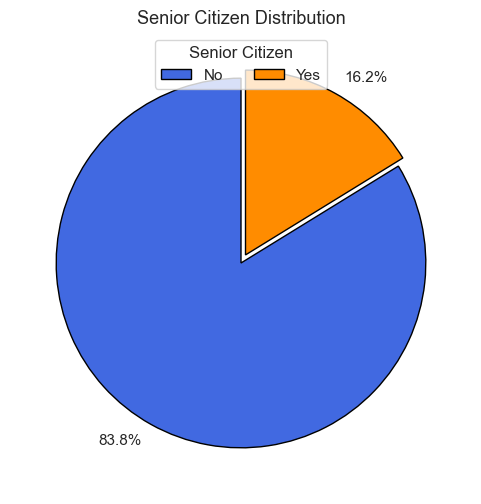

In [15]:
plt.figure(figsize=(6,6))

senior_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100
labels = ['No', 'Yes']
colors = ['royalblue', 'darkorange']

explode = [0, 0.05]

plt.pie(
    senior_counts,
    labels=[f"{v:.1f}%" for v in senior_counts],
    autopct=None,
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'black'}
)

plt.title("Senior Citizen Distribution", fontsize=13)
plt.legend(labels, title="Senior Citizen", loc="upper center", ncol=2)
plt.show()


# Churn status

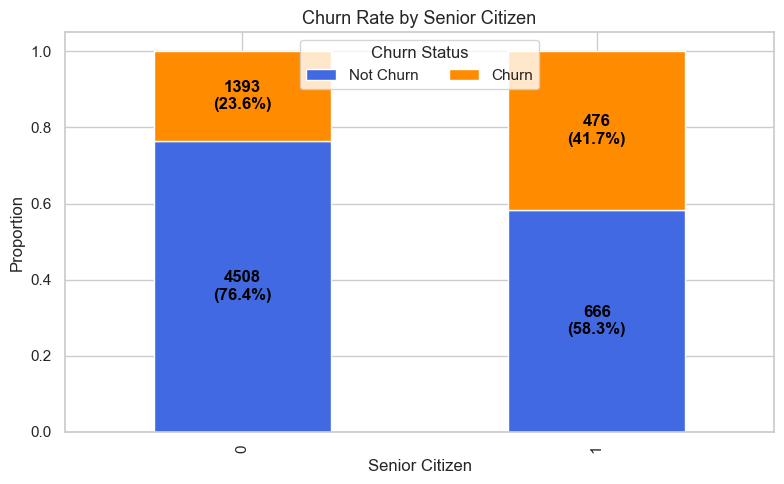

In [16]:

counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

colors = ['royalblue', 'darkorange']

ax = props.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(8,5),
    edgecolor='white'
)

for i, (idx, row) in enumerate(props.iterrows()):
    bottom = 0
    for j, churn_type in enumerate(row.index):
        value = counts.loc[idx, churn_type]
        percent = row[churn_type] * 100
        ax.text(
            i,
            bottom + row[churn_type]/2,
            f"{value}\n({percent:.1f}%)",
            ha='center',
            va='center',
            color='black',
            fontweight='bold'
        )
        bottom += row[churn_type]

plt.title("Churn Rate by Senior Citizen", fontsize=13)
plt.xlabel("Senior Citizen")
plt.ylabel("Proportion")
plt.legend(title="Churn Status", labels=["Not Churn", "Churn"], loc="upper center", ncol=2)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


# Churn por servicio

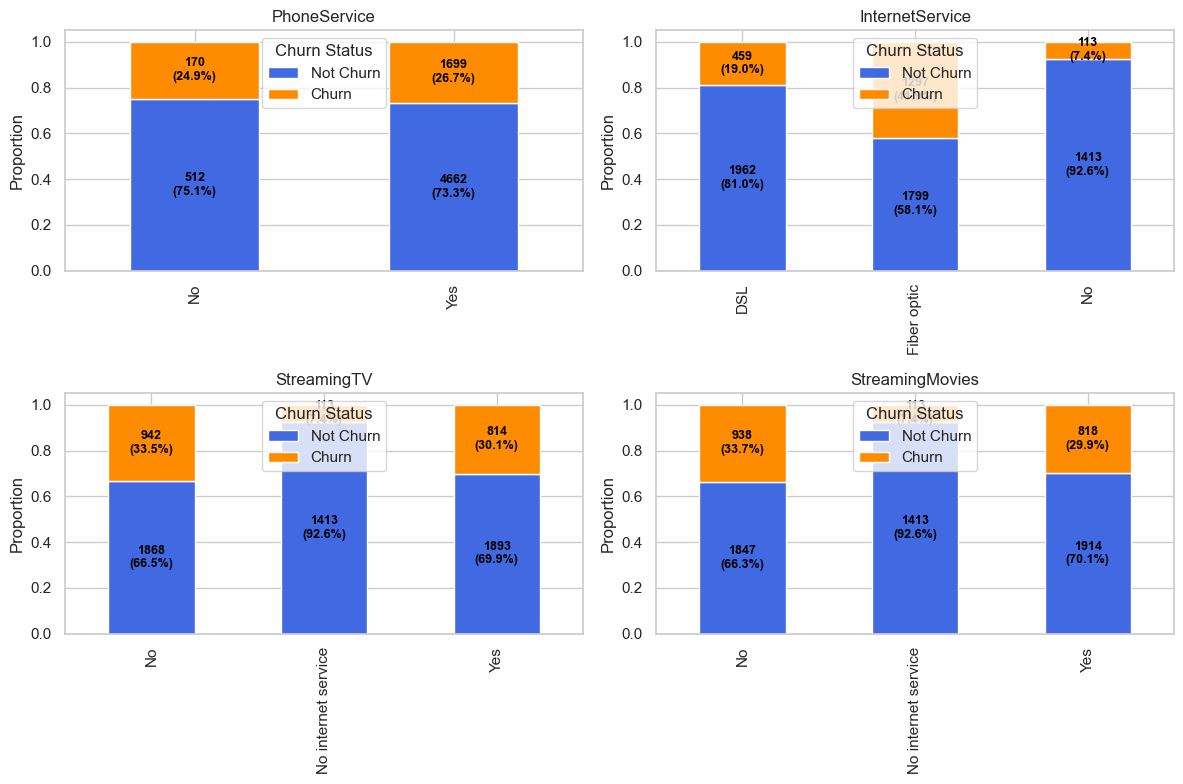

In [17]:

cols = ['PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies']

colors = ['royalblue', 'darkorange']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Crear tabla de conteos y proporciones
    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    props = counts.div(counts.sum(axis=1), axis=0)

    props.plot(
        kind='bar',
        stacked=True,
        color=colors,
        ax=axes[i],
        edgecolor='white'
    )

    for j, (idx, row) in enumerate(props.iterrows()):
        bottom = 0
        for k, churn_type in enumerate(row.index):
            value = counts.loc[idx, churn_type]
            percent = row[churn_type] * 100
            axes[i].text(
                j,
                bottom + row[churn_type] / 2,
                f"{value}\n({percent:.1f}%)",
                ha='center',
                va='center',
                color='black',
                fontweight='bold',
                fontsize=9
            )
            bottom += row[churn_type]

    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("Proportion")
    axes[i].set_xlabel("")
    axes[i].legend(["Not Churn", "Churn"], title="Churn Status", loc='upper center')

plt.tight_layout()
plt.show()


# Distribucion de clientes que abandonan por susbscripcion de TV y servicio de internet

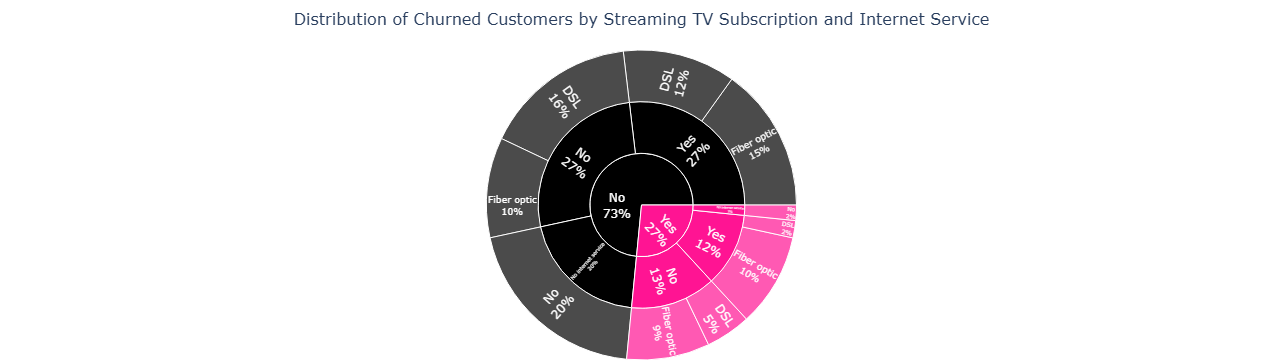

In [18]:

fig = px.sunburst(
    df,
    path=['Churn', 'StreamingTV', 'InternetService'],
    color='Churn',
    color_discrete_map={'No': 'black', 'Yes': 'deeppink'},
    title="Distribution of Churned Customers by Streaming TV Subscription and Internet Service",
)

fig.update_traces(
    textinfo='label+percent entry',
    insidetextorientation='radial'
)

fig.update_layout(
    title_x=0.5,
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()


# Distribucion de clientes que abandonan por subscripción de streaming de peliculas y servicio de internet

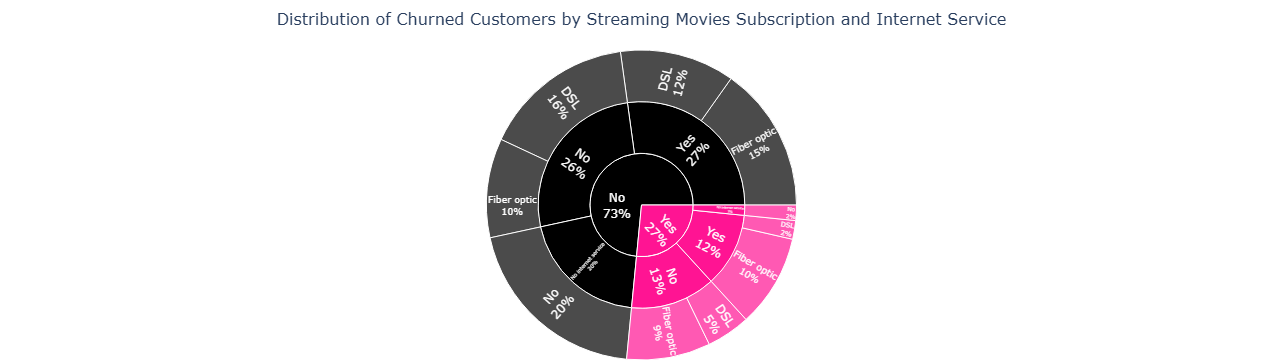

In [19]:

fig = px.sunburst(
    df,
    path=['Churn', 'StreamingMovies', 'InternetService'],
    color='Churn',
    color_discrete_map={'No': 'black', 'Yes': 'deeppink'},
    title="Distribution of Churned Customers by Streaming Movies Subscription and Internet Service",
)


fig.update_traces(
    textinfo='label+percent entry',
    insidetextorientation='radial'
)

fig.update_layout(
    title_x=0.5,
    title_font_size=16,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=50, l=0, r=0, b=0)
)

fig.show()


# Churn por tipo de contrato

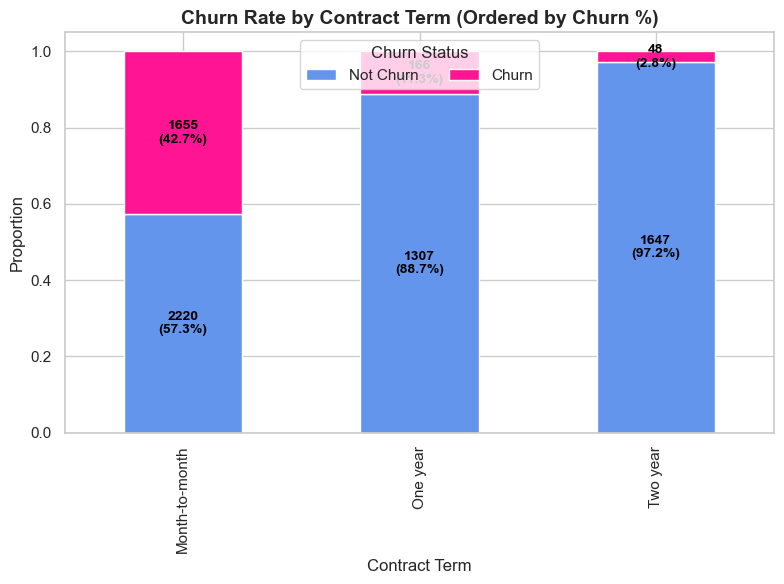

In [20]:
order = (counts['Yes'] / counts.sum(axis=1)).sort_values(ascending=False).index
props = props.loc[order]
counts = counts.loc[order]

counts = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0)

order = (counts['Yes'] / counts.sum(axis=1)).sort_values(ascending=False).index
props = props.loc[order]
counts = counts.loc[order]

colors = ['cornflowerblue', 'deeppink']

ax = props.plot(
    kind='bar',
    stacked=True,
    color=colors,
    figsize=(8,6),
    edgecolor='white'
)

for i, (idx, row) in enumerate(props.iterrows()):
    bottom = 0
    for j, churn_type in enumerate(row.index):
        value = counts.loc[idx, churn_type]
        percent = row[churn_type] * 100
        ax.text(
            i,
            bottom + row[churn_type]/2,
            f"{value}\n({percent:.1f}%)",
            ha='center',
            va='center',
            color='black',
            fontweight='bold',
            fontsize=10
        )
        bottom += row[churn_type]

plt.title("Churn Rate by Contract Term (Ordered by Churn %)", fontsize=14, fontweight='bold')
plt.xlabel("Contract Term")
plt.ylabel("Proportion")
plt.legend(title="Churn Status", labels=["Not Churn", "Churn"], loc="upper center", ncol=2)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


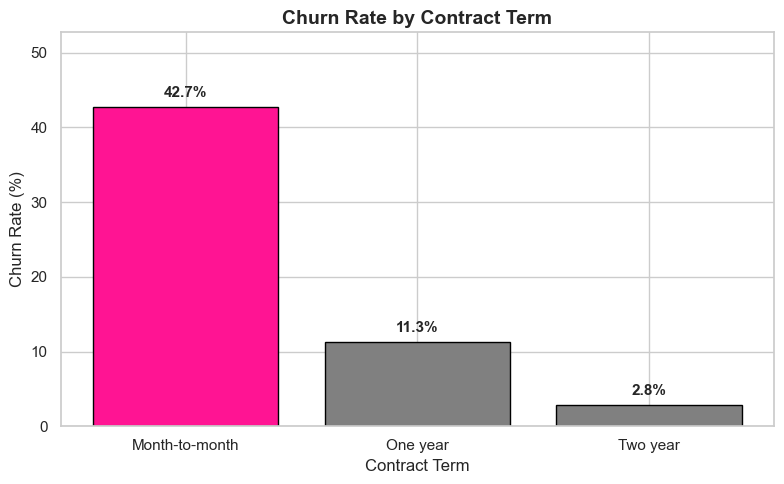

In [21]:

churn_rate = (
    df.groupby('Contract')['Churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['Yes'] * 100
).sort_values(ascending=False)

colors = ['deeppink' if i == churn_rate.idxmax() else 'gray' for i in churn_rate.index]

plt.figure(figsize=(8,5))
bars = plt.bar(churn_rate.index, churn_rate.values, color=colors, edgecolor='black')

for bar, rate in zip(bars, churn_rate.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{rate:.1f}%",
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11
    )

plt.title("Churn Rate by Contract Term", fontsize=14, fontweight='bold')
plt.xlabel("Contract Term")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, churn_rate.max() + 10)
plt.tight_layout()
plt.show()


# Abandono por metodo de pago

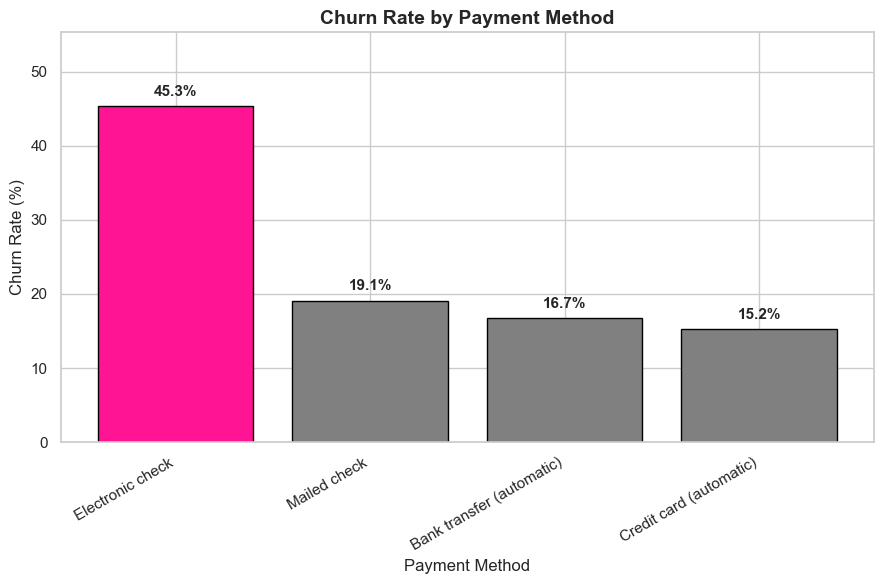

In [22]:

churn_rate = (
    df.groupby('PaymentMethod')['Churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['Yes'] * 100
).sort_values(ascending=False)

colors = ['deeppink' if i == churn_rate.idxmax() else 'gray' for i in churn_rate.index]

plt.figure(figsize=(9,6))
bars = plt.bar(churn_rate.index, churn_rate.values, color=colors, edgecolor='black')

for bar, rate in zip(bars, churn_rate.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{rate:.1f}%",
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11
    )

plt.title("Churn Rate by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, churn_rate.max() + 10)
plt.tight_layout()
plt.show()


# Abandono según tipo de factura electrónica

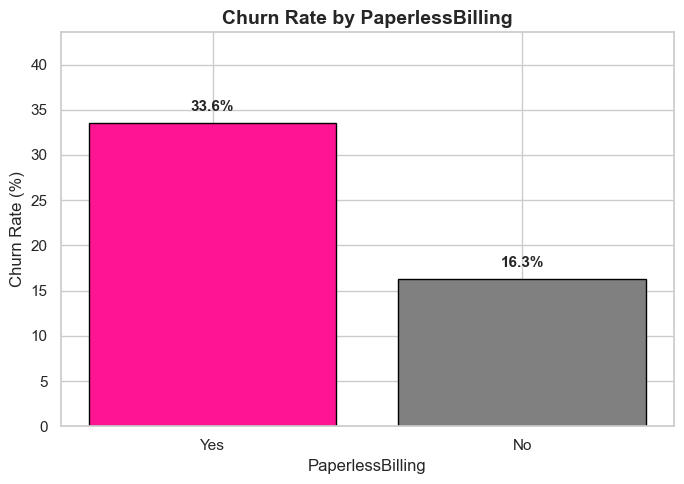

In [23]:
churn_rate = (
    df.groupby('PaperlessBilling')['Churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)['Yes'] * 100
).sort_values(ascending=False)

colors = ['deeppink' if i == churn_rate.idxmax() else 'gray' for i in churn_rate.index]

plt.figure(figsize=(7,5))
bars = plt.bar(churn_rate.index, churn_rate.values, color=colors, edgecolor='black')

for bar, rate in zip(bars, churn_rate.values):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 1,
        f"{rate:.1f}%",
        ha='center',
        va='bottom',
        fontweight='bold',
        fontsize=11
    )
    
plt.title("Churn Rate by PaperlessBilling", fontsize=14, fontweight='bold')
plt.xlabel("PaperlessBilling")
plt.ylabel("Churn Rate (%)")
plt.ylim(0, churn_rate.max() + 10)
plt.tight_layout()
plt.show()